# Responsible AI

Once a model is in prod. it's impact extends far beyond the teams who built it

Several stakeholders for a model:
- Model Builders
    - Data Scientists and ML Researchers directly involved in building the model
- ML Engineers
    - Members of MLOPs teams directly involed in deploying the model
- Business Decision Makers
    - Decide to incoroportate the model into their business process or not
    - Need to evaluate if the model is fit for purpose
- End Users of ML systems
    - Make us of predictions from an ML model.
    - Example users: cutomers, employees and hybrids of these. 
- Regulatory and Compliance Agencies
    - People and organisations who need to execturve-level summary of how a model is making decisions from a regulatory compliance perspective. This could include financial auditors, government agencies etc...
    
Heuristic Benchmark design pattern provides a way of putting the models performance in a context that end users and decision makes can understand. The explainable predictions pettern provides approaches to improving trust in ML systems by fostering an understanding of the signals a model is using to make predictions. The fairness lens design pattern aims to ensure that models behave equitable across different subsets of users and predictions scenarios.

## Design Pattern 28: Heuristic Benchmark

Heuristic benchmark pattern compares an ML model against a simple, easy-to-understand heuristic in order to explain the models performance to business decision makers

### Problem

- When reporting metrics of a model its difficult to determine if this model is good or bad
    - e.g. the mean absolute error of a taxi ride length prediction is 1,200 seconds. Is this good or bad?
- Models performance is stated in cold hard numbers that are difficult for end users to put into context

### Solution

- If this a second ML model being developed it's easy to compare it against the earlier version
- If it's the very first model the solution is to create a simple benchmark for the sole purpose of comparing against our newly developed ML model. The heuristic benchmark.
- A good heuristic benchmark should be simple to understand and relately trivial to compute
    - If we have to defend the algorithm we need to use a simplier one
    - Good heuristics are rules of thumb, constants or bulk statistics 
    - Avoid the temptation to train even a simple ML model
    
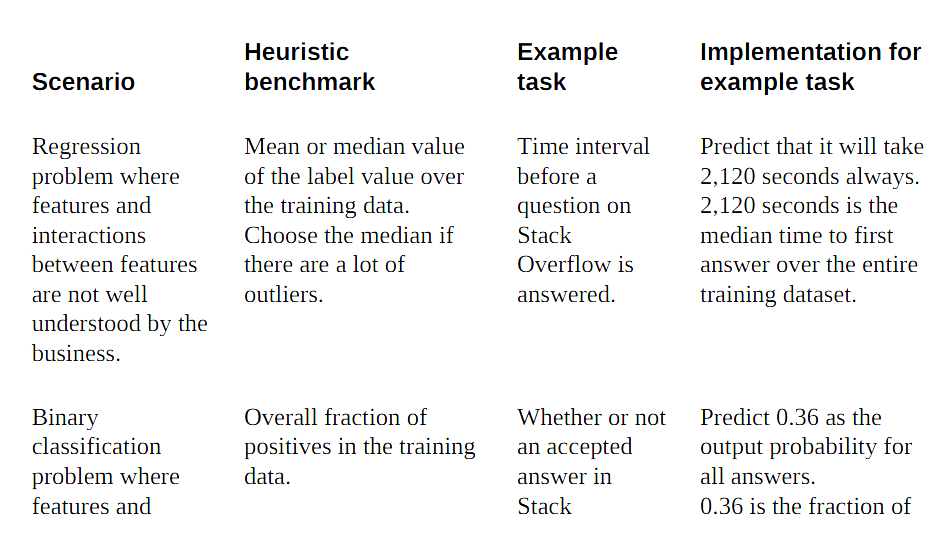

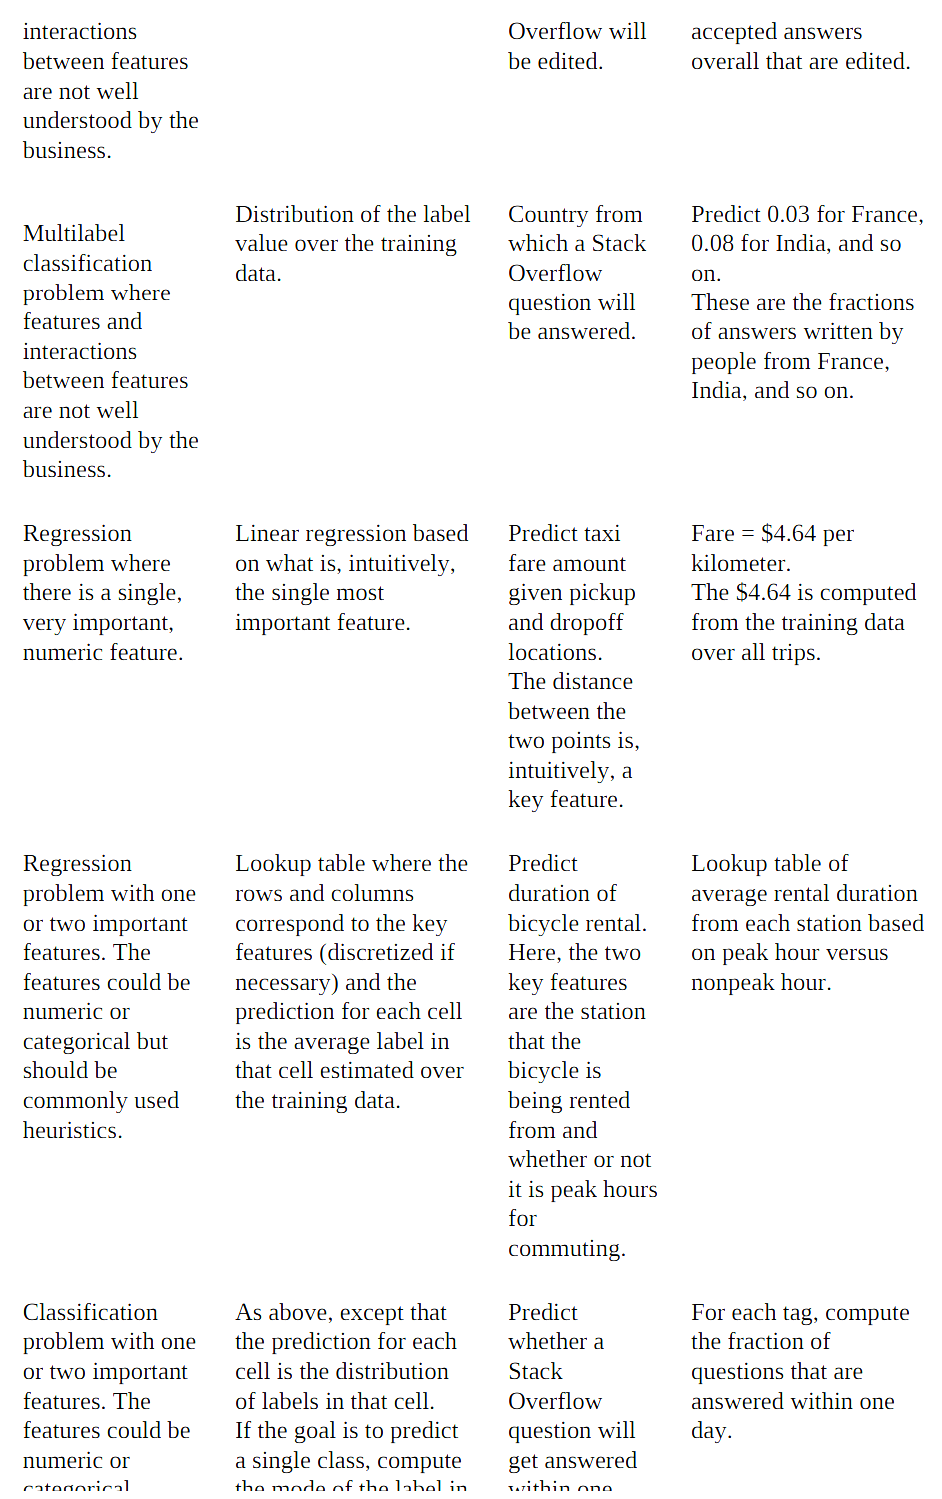

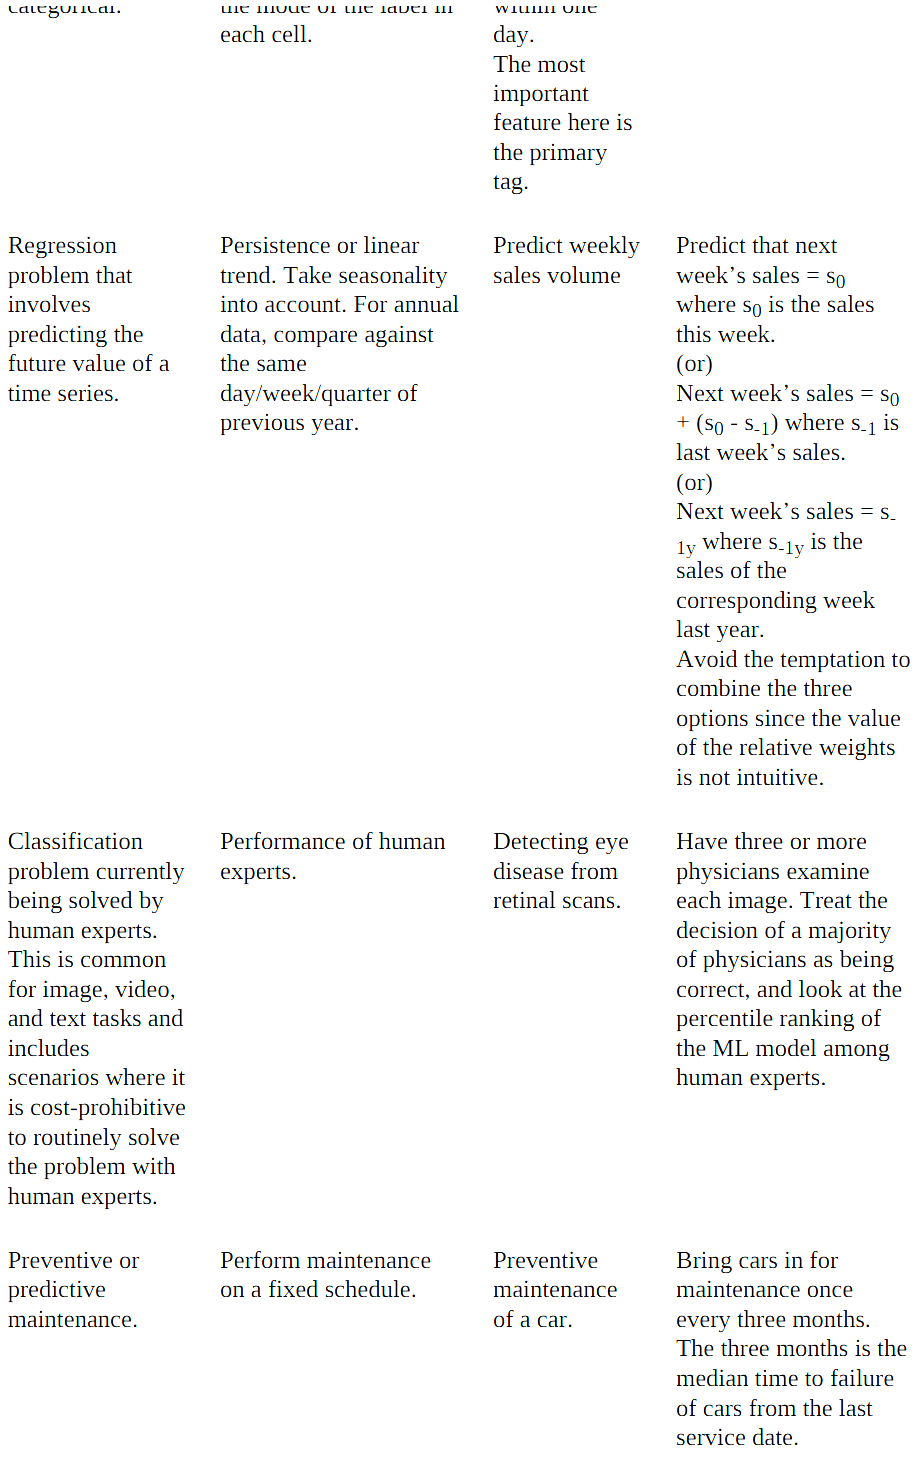

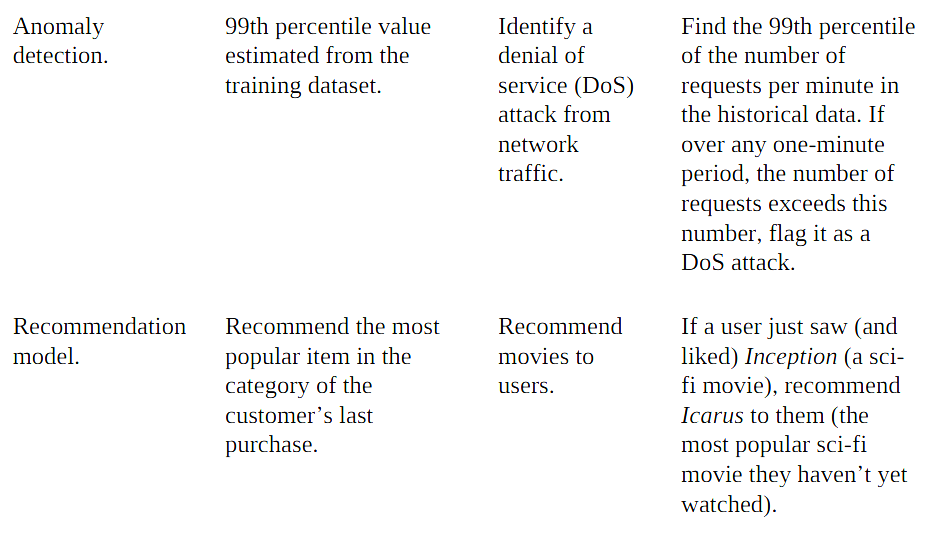


The table above refers to "important features". These are important because they are widely accepted within the business as having a well-understood impact on the prediction problem.

### Trade-Offs and Alternatives

#### Development Check
- Heuristic benchmark is useful beyond providing explaining the importance of ML modles
- It can help diagnose probelms with a particular model approach
- E.g.
    - Heutric model predicts duration of bike rentals near station by taking the average duration only on weekdays
    - When we build the ML model good to compare against this model
    - To do this, we will be evaluating model perforance on different statifications of the evaluation dataset
    - We can then diagnose whether our model is overemphasing the busy, popular stations and ingnoring infrequent stations in the training data 
    - If this happens we can experiment with increasing model complexity or balancing the dataset to overweight less popular stations
    
    
#### Human Experts

- Classification problems use experts
- Multiple opinions identify the extent to which humans make errors and compare the error rate of the model against that of human experts
- Can use experts even if we have actual ground truth

#### Utility Value

- If we prove the ML model is say 1% better than the heuristic model the next question could be "Is a 1% improvement good enough?", "Is it worth putting the ML model into production rather than deploying the heuristic model?"
- Important to translate the models value into utility value
    - This could be monetary, better search results, earlier disease detection


## Design Pattern 29: Explainable Predictions

- Increases trust in ML systems by providing users with an understanding oh how and whay models make certain predictions
- For all models it is useful to interpret predictions in order to understand the combinations of features influencing model behaviour

#### Problem

- Typical metrics e.g. accuracy, precision, recall, etc... tell you how correct the model is but does not give insight into why a model arrived at those predictions
- Models can only be improved to a certain point without an understanding of the features it's relying on to make predictions

#### Solution

- Use explainability
    - Can help reveal bias
    - Explains what's going on under the hood of a model
- Models like decisons trees and linear regression and interpretable by design
    - e.g. the co-efficients of a linear regression model give insight into the model
        - Be careful here, the co-efficients don't tell you the relationship between features especially if they are different units e.g. if one feature is the number of cylinders in a car and another in the vehicles weight. Get more complex when you introduce one-hot encoded features.



- When models are more complex we rely on _post hoc_ explainability methods to approximate the relationships between the models features and it's output
- Typicall, post hoc methods don't rely on the models internals like learned weights
- Many methods in this area, one of them is _feature attributions_
    - Maps the relationship between the feature inputs to the models outputs
- Two types of feature attribution:
    - *Instance level*: Explain the models output for an individual prediction. Useful when trying to dive deeper on a single prediction
    - *Global*: Analyses the models behaviour across an aggregate to draw conclusions about how the model is behaving as a whole. Typically done by averaging instance-level feature attributions from the test dataset. Will tell you overall what certain features lead to certain predictions.


    
- Two methods to approach instance-level and global explainations:
    - *Sampled Shapley*
        - This approach determines a features marginal contribution by calculating how much adding and removing that feature affects a prediction, analysed over multiple conginations of feature values
        - [Paper](https://oreil.ly/ubEjW)
    - *Integratied Gradients (IG)*
        - Using a predefined model baseline, IG calculates the derivaties (gradients) along the apth from this baseline to a specific input
        - [Paper](https://oreil.ly/sy8f8)
        
        
- [Google Paper on AI Explainations](https://cloud.google.com/vertex-ai/docs/tabular-data/classification-explanations)
- [Tool: Pytorch - Captum](https://github.com/pytorch/captum)
    - [Captum Docs](https://captum.ai/api/index.html)

#### Model Baseline

- Feature attribution attempts to provide numerical values for each feature indiciating how much that feature contributed to the final output
- If a value for feature x is 0.4 and feature y is -0.4
    - Without context these values to mean much and what are they relative to?
    - They are relative to the model baseline
- Feature attibution values are all relative to a prefefined baseline prediction value
- Baseline predictions can either be informative or uninformative
    - Uninformative baselines typcially compare against some average case across the training dataset
        - In in image model, an uninformative baseline could be a solid black or white image
        - In a model with numerical inputs a baseline could be generate a predicitons with median / mean values
        - In nlp, with embeddings, 0 for all word embeddings
        - Say the prediction of trip duration is 5 minutes and baseline predicted 8 minutes (taking the mean). We should expect most of the attribution values to be less than the baseline because the prediction is less than the baseline and vice versa
        - In the above scenario the mean of each feature is taken and passed through the model to create the 8 minute value
    - Informative baselines comapre the mdoel's predictions with a specific alternative scenario
        - In a case of fraudulent transactions, in informative baseline might answer the quesitons, "why was this transaction flagged as fraud insead of nonfraud?"
        - Instead of taking the median feature values across the entire training dataset to calculat the baseline, we would take the median of only the nonfraudulent values

#### SHAP

- To feature attribution values SHAP calculates how much adding or removing a each feature contributes to a models's prediction output
- It performs the analysis across many different combinations of feature values and model ouputs
- SHAP is model agnostic and works with models trained on image, text and tabular data (this included deep learning models)
    - Examples in page 333 and 334 in book
    
- For a single plot on a single predition in a regression scenario (see image below)
    - The attribution values are relative to the models baseline (calculated from a sample of training data passed to SHAP)
    - The sum of the absolute values each feature contributes should be equal to the influence on the regression outcome
        - if the sum is 11 and we're predicting a vehicles MPG and then the sum of the attributions impact is 11 MPG
    - In this the most important indicator for fuel efficiency is weight, pushing the models prediction down by 6MPG
        
        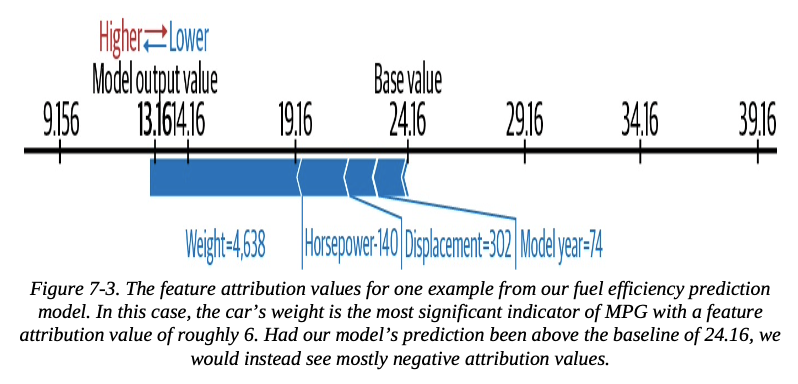
        
        
- It is possible to get a summary explanation:

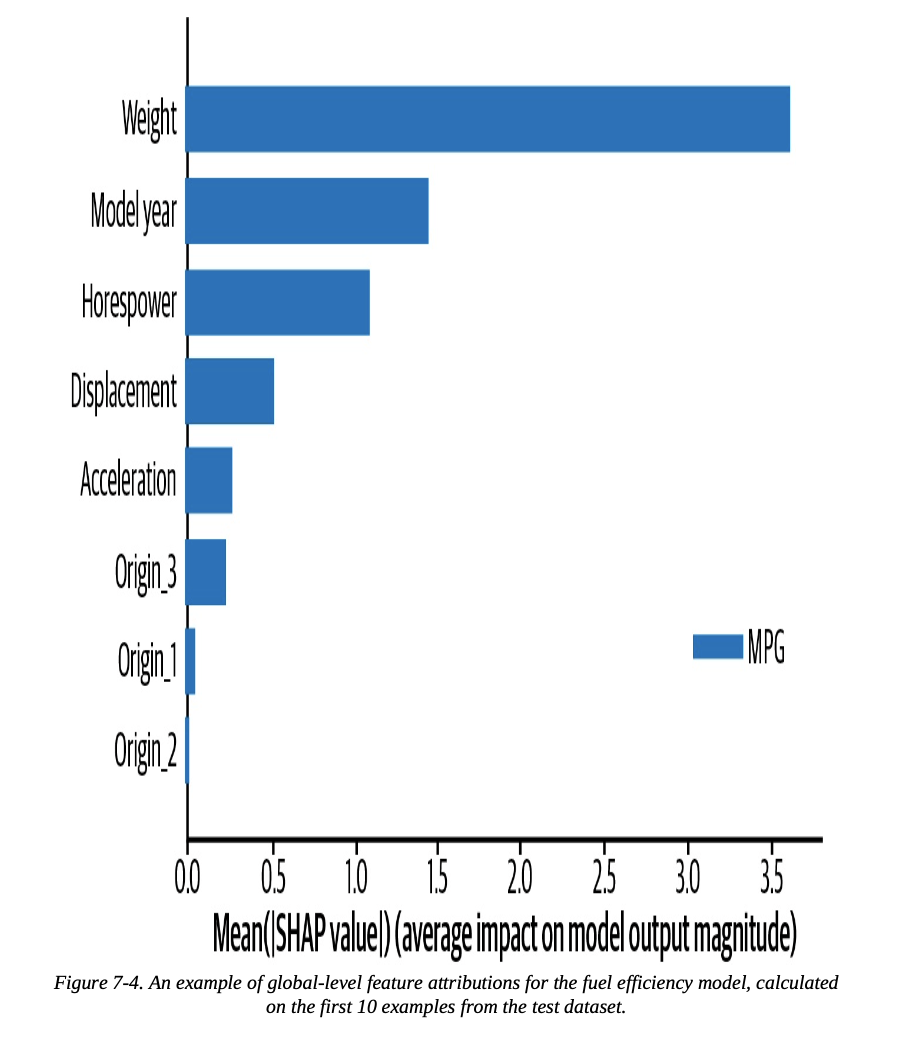


- The summary explanation should be calculated on a large test set which can be used to summarise the behaviour of our model to stakeholders

### Trade-Offs and Alternatives

- Explainations provide important insights into how a model is making decisions, they are only as good as the model's training data, quality of your model, and the chosen baseline.

#### Data Selection Bias

- Model are direct representation of their training data
- If we don't catch data imbalances before training a model, explainability methods like feature attributions can help bring data selection bias to light.
- For example, say we have a model to predict type of boats
    - The model correctly predicts a boat image as a kayak
    - The feature attribution however shows that the model identified the boat type correctly beacuse it was relying on the boat's paddle to predict kayak
        - We've just discovered that model is the paddle to identify the boat type rather than the shape of the boat
    - This is a signal that there might not be enough variance in training images for each class - we'll likely need to go back and add ore images of kayaks at different angles, with and without kayaks

#### Counterfactual Analysis and Example-based Explanations

- This is an instance-level explainability technique that refers to finding examples from our dataset with similar features that results in different prediction outcomes 
- One what to do this is with the [What-If Tool](https://pair-code.github.io/what-if-tool/)
    - Provides an in-depth analysis and visualisation of the models outputs
- When visualizing data points from our test set in the What-If Tool, we have the option to show the nearest counterfactual data point to the one we’re selecting. Doing this will let us compare feature values and model predictions for these two data points, which can help us better understand the features our model is relying on most.
- Example-based explanations compare new examples and their corresponding predictions to similar examples from our training dataset. This type of explanation is especially useful for understanding how our training dataset affects model behavior. Example-based explanations work best on image or text data, and can be more intuitive than feature attributions or counterfactual analysis since they map a model’s prediction directly to the data used for training.

#### Limitations of Explanations

- We should be cautious about placing too much trust in our model’s explanations, or assuming they provide perfect insight into a model. Explanations in any form are a direct reflection of our training data, model, and selected baseline. That is to say, we can’t expect our explanations to be high quality if our training dataset is an inaccurate representation of the groups reflected by our model, or if the baseline we’ve chosen doesn’t work well for the problem we’re solving.
- The relationship that explanations can identify between a model’s features and output is representative only of our data and model, and not necessarily the environment outside this context. As an example, let’s say we train a model to identify fraudulent credit card transactions and it finds, as a global-level feature attribution, that a transaction’s amount is the feature most indicative of fraud. Following this, it would be incorrect to conclude that amount is always the biggest indicator of credit card fraud—this is only the case within the context of our training dataset, model, and specified baseline value.
- We can think of explanations as an important addition to accuracy, error, and other metrics used to evaluate ML models. They provide useful insight into a model’s quality and potential bias, but should not be the sole determinant of a high-quality model. We recommend using explanations as one piece of model evaluation criteria in addition to data and model evaluation, and many of the other patterns outlined in this and previous chapters.

## Design Pattern 30: Fairness Lens